### Modeling Exercises - K Means

Do your work for this exercise in a notebook named ```modeling``` within your ```clustering-exercises``` repository.

**1.  Clustering with the Iris Dataset.  Using this lesson as a guide, perform clustering on the iris dataset.**

**a. Choose features other than the ones used in the lesson.**

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import viz_kmeans

import wrangle 

np.random.seed(4)

import pydataset
from pydataset import data

np.set_printoptions(suppress=True)

In [3]:
#acquire data
iris = sns.load_dataset('iris')
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [4]:
# choose features to cluster on 
X = iris[['sepal_width', 'petal_width']]

In [5]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [6]:
#create the model (specify three clusters), fit the model, use the model to predict
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2], dtype=int32)

In [7]:
#Add the cluster prediction to the original database

iris['cluster'] = kmeans.predict(X_scaled)
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1


**b. Visualize the results of your clustering.**

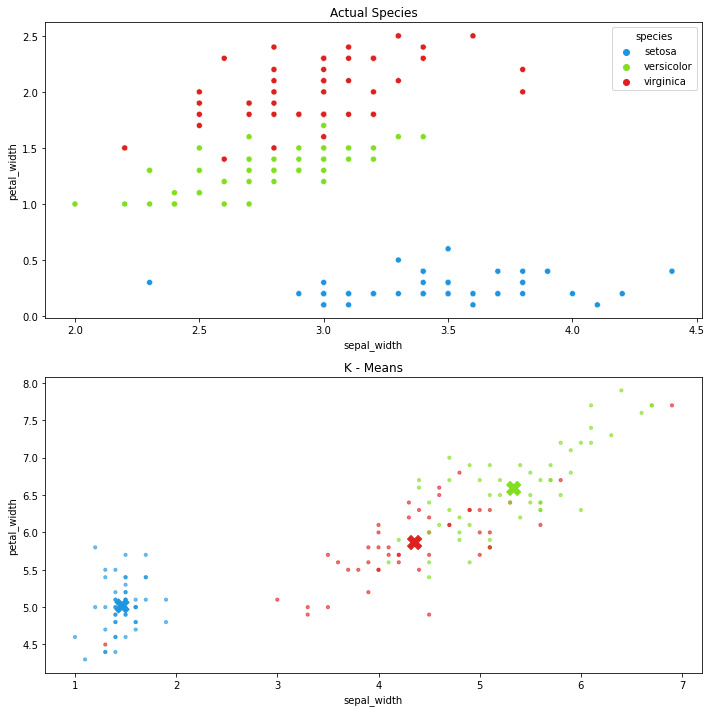

In [8]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
#viz_kmeans.viz_iris(iris, kmeans)

centroids = np.array(iris.groupby('cluster')['petal_length', 'sepal_length'].mean())
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]
# cen_x = [i[0] for i in kmeans.cluster_centers_]
# cen_y = [i[1] for i in kmeans.cluster_centers_]
iris['cen_x'] = iris.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
iris['cen_y'] = iris.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

colors = ['#DF2020','#2095DF', '#81DF20' ]
iris['c'] = iris.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
#plot scatter chart for Actual species and those predicted by K - Means

#specify custom palette for sns scatterplot
colors1 = ['#2095DF','#81DF20' ,'#DF2020']
customPalette = sns.set_palette(sns.color_palette(colors1))

#plot the scatterplots

#Define figure (num of rows, columns and size)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

# plot ax1 
ax1 = plt.subplot(2,1,1) 
sns.scatterplot(data = iris, x = 'sepal_width', y = 'petal_width', ax = ax1, hue = 'species', palette=customPalette)
plt.title('Actual Species')

#plot ax2
ax2 = plt.subplot(2,1,2) 
ax2.scatter(iris.petal_length, iris.sepal_length, c=iris.c, alpha = 0.6, s=10)
ax2.set(xlabel = 'sepal_width', ylabel = 'petal_width', title = 'K - Means')

# plot centroids on  ax2
ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)
   
iris.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
plt.tight_layout()
plt.show()

c. Use the elbow method to visually select a good value for k.

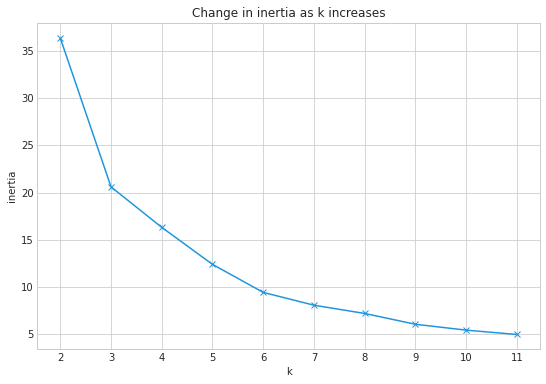

In [9]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

### Takeaway --
The elbow method shows 3 as a good value for k.

d. Repeat the clustering, this time with 3 different features.

In [10]:
# choose features to cluster on 
X = iris[['sepal_width', 'petal_width', 'sepal_length']]

In [11]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [12]:
#create the model (specify three clusters), fit the model, use the model to predict
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
kmeans.predict(X_scaled)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [13]:
#Add the cluster prediction to the original database

iris['cluster_2'] = kmeans.predict(X_scaled)
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,cluster_2
0,5.1,3.5,1.4,0.2,setosa,1,2
1,4.9,3.0,1.4,0.2,setosa,1,2


b. Visualize the results of your clustering.

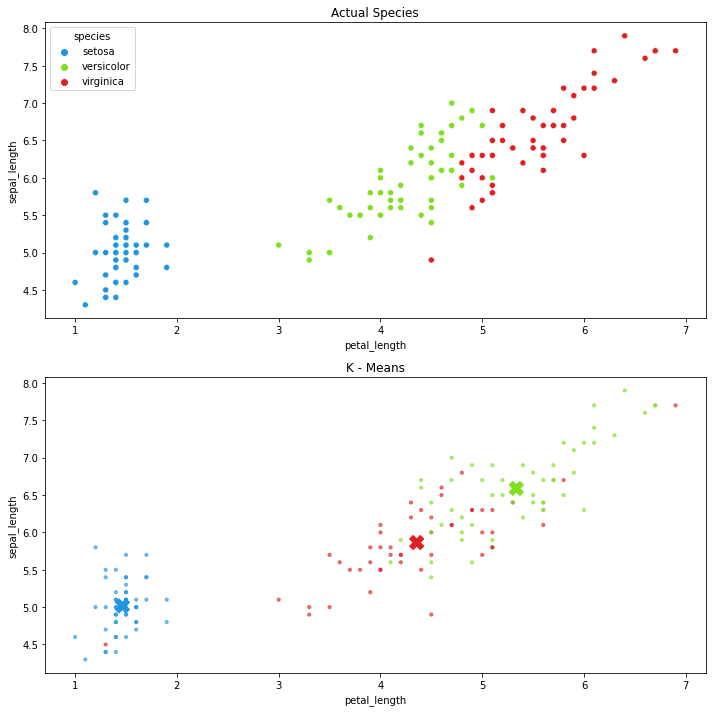

In [14]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_kmeans.viz_iris(iris, kmeans)

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [15]:
sql = 'select * from customers'

In [16]:
#import sklearn kmeans
from sklearn.cluster import KMeans

# acquire mall customers data using the query:

def get_db_url(database):
    from env import host, user, password
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

def get_mall_customers(sql):
    url = get_db_url('mall_customers')
    mall_df = pd.read_sql(sql, url, index_col='customer_id')
    return mall_df

In [17]:
# acquire data
mall = get_mall_customers(sql)

In [18]:
mall.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [19]:
mall.rename(columns = {'gender': 'is_male'}, inplace = True)
mall.head(2)

,is_male,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81


In [20]:
mall.is_male.replace({'Male':'1', 'Female':'0'}, inplace=True)
mall.head()


,is_male,age,annual_income,spending_score
customer_id,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [21]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   is_male         200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [23]:
mall.is_male.value_counts()

0    112
1     88
Name: is_male, dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'annual_income'}>],
       [<AxesSubplot:title={'center':'spending_score'}>, <AxesSubplot:>]],
      dtype=object)

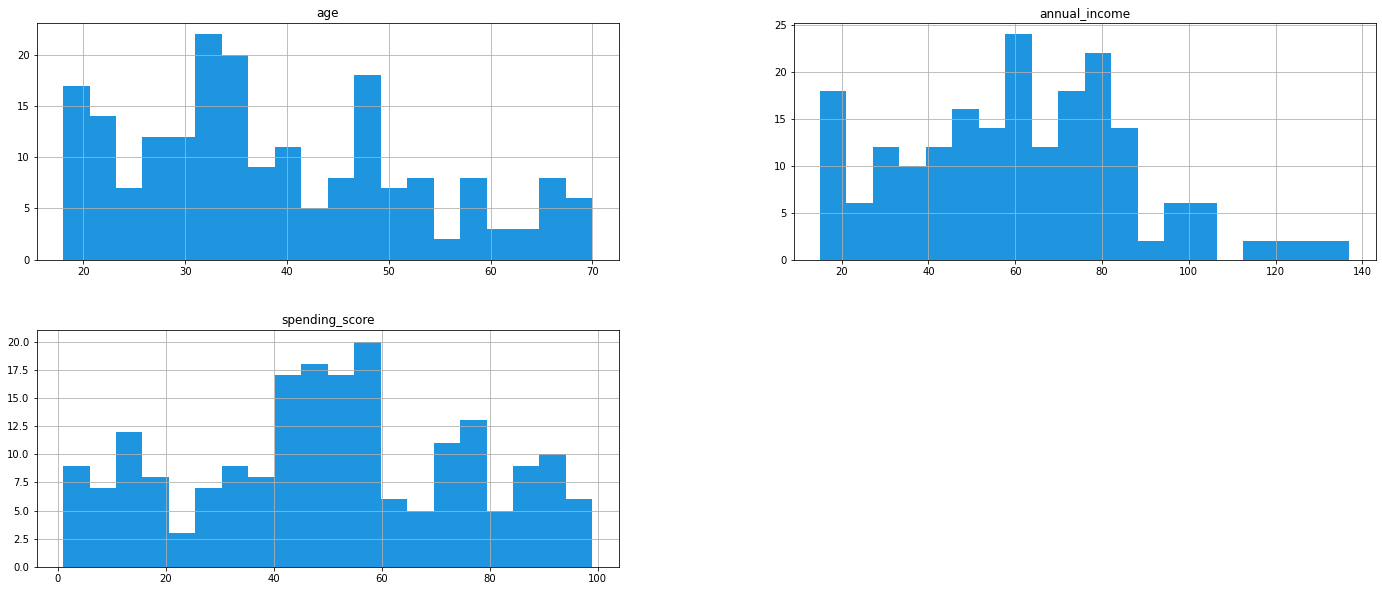

In [24]:
mall.hist(figsize=(24,10), bins=20)

<AxesSubplot:ylabel='spending_score'>

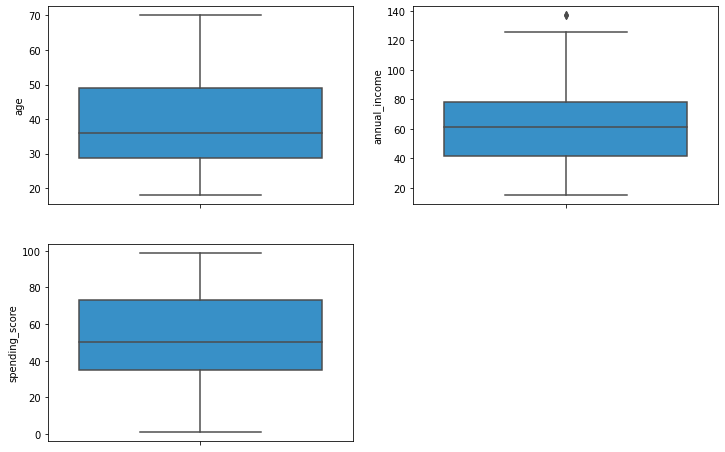

In [25]:
# visualize outliers using boxplots:

plt.figure(figsize = (12,8))
plt.subplot(221)
sns.boxplot(y = mall.age)

plt.subplot(222)
sns.boxplot(y = mall.annual_income)

plt.subplot(223)
sns.boxplot(y = mall.spending_score)

In [28]:
# function to detect and eliminate outliers using IQR rule

def outlier_function(df, cols, k):
    for col in df[cols]:
        q1 = mall.annual_income.quantile(0.25)
        q3 = mall.annual_income.quantile(0.75)
        iqr = q3 - q1
        upper_bound =  q3 + k * iqr
        lower_bound =  q1 - k * iqr     
        df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]
    return df

mall = outlier_function(mall, ['age', 'spending_score', 'annual_income'], 1.5)
mall.shape

(198, 4)

In [29]:
# choose features to cluster on 
X = mall[['age','annual_income','is_male']]
X.head(3)

,age,annual_income,is_male
customer_id,,,
1,19,15,1
2,21,15,1
3,20,16,0


In [24]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [25]:
X_scaled.head(2)

,age,annual_income,is_male
1,-1.424569,-1.738999,1.128152
2,-1.281035,-1.738999,1.128152


In [26]:
# make the thing
kmeans = KMeans(n_clusters=3)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2,
       0, 2, 1, 2, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 2,
       0, 1, 2, 0, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 0, 0, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2, 2,
       0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       1, 2, 1, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 2], dtype=int32)

In [27]:
mall.head()
X_scaled.head()

,age,annual_income,is_male
1,-1.424569,-1.738999,1.128152
2,-1.281035,-1.738999,1.128152
3,-1.352802,-1.700830,-0.886405
4,-1.137502,-1.700830,-0.886405
5,-0.563369,-1.662660,-0.886405


In [28]:
# make a new column named cluster in mall and X_scaled dataframe

mall['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

mall.head()

,is_male,age,annual_income,spending_score,cluster
customer_id,,,,,
1,1,19,15,39,2
2,1,21,15,81,2
3,0,20,16,6,0
4,0,23,16,77,0
5,0,31,17,40,0


In [29]:
# look at sample of 15 randomly selected rows in mall dataset
X_scaled.sample(15)

,age,annual_income,is_male,cluster
153,0.369598,0.665675,-0.886405,0
76,-0.922202,-0.250391,1.128152,2
52,-0.419835,-0.708425,1.128152,2
177,1.374332,1.047369,1.128152,1
88,-1.209269,-0.135883,-0.886405,0
102,0.728432,0.054964,-0.886405,0
189,0.154298,1.619911,-0.886405,0
170,-0.491602,1.009200,1.128152,2
7,-0.276302,-1.624491,-0.886405,0
184,-0.706902,1.429063,-0.886405,0


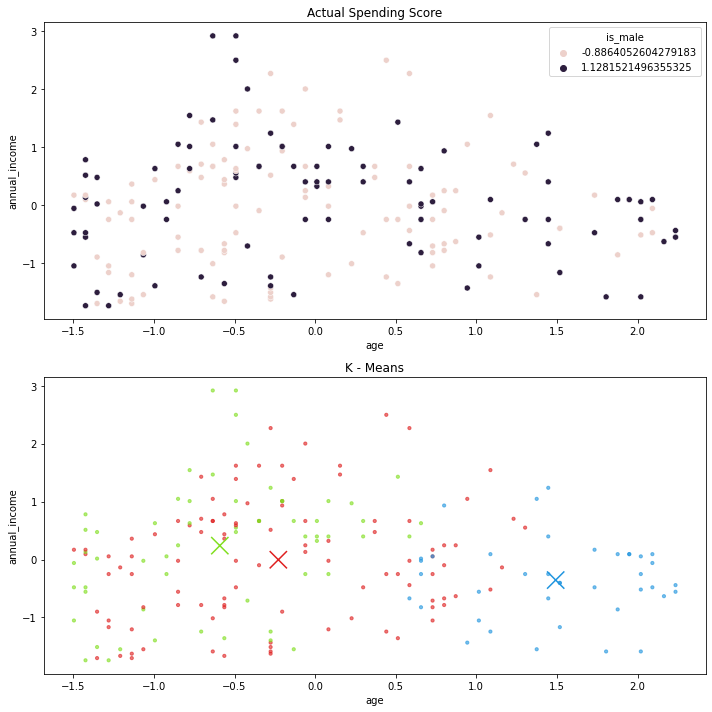

In [34]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
#viz_kmeans.viz_mall(mall, kmeans)
centroids = np.array(X_scaled.groupby('cluster')['age', 'annual_income'].mean())
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]
    # cen_x = [i[0] for i in kmeans.cluster_centers_]
    # cen_y = [i[1] for i in kmeans.cluster_centers_]
X_scaled['cen_x'] = X_scaled.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
X_scaled['cen_y'] = X_scaled.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
colors = ['#DF2020','#2095DF', '#81DF20' ]
X_scaled['c'] = X_scaled.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
    #plot scatter chart for Actual species and those predicted by K - Means
    #specify custom palette for sns scatterplot
colors1 = ['#2095DF','#81DF20' ,'#DF2020']
customPalette = sns.set_palette(sns.color_palette(colors1))
    #plot the scatterplots
    #Define figure (num of rows, columns and size)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
    # plot ax1 
ax1 = plt.subplot(2,1,1) 
sns.scatterplot(data = X_scaled, x = 'age', y = 'annual_income', ax = ax1, hue = 'is_male', palette=customPalette)
plt.title('Actual Spending Score')
    #plot ax2
ax2 = plt.subplot(2,1,2) 
ax2.scatter(X_scaled.age, X_scaled.annual_income, c=X_scaled.c, alpha = 0.6, s=10)
ax2.set(xlabel = 'age', ylabel = 'annual_income', title = 'K - Means')

    # plot centroids on  ax2
ax2.scatter(cen_x, cen_y, marker='x', c=colors, s=300)
    
X_scaled.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
plt.tight_layout()
plt.show()

In [31]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[-0.2284573 , -0.0034128 , -0.88640526],
       [ 1.49210309, -0.35413401,  0.61159897],
       [-0.59134536,  0.23998867,  1.12815215]])

# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

In [31]:
# Centriods for unscaled data?

centroids = mall.groupby('cluster')['age','annual_income'].mean()
centroids

,age,annual_income
cluster,,
0,35.666667,60.470588
1,59.641026,51.282051
2,30.610169,66.847458


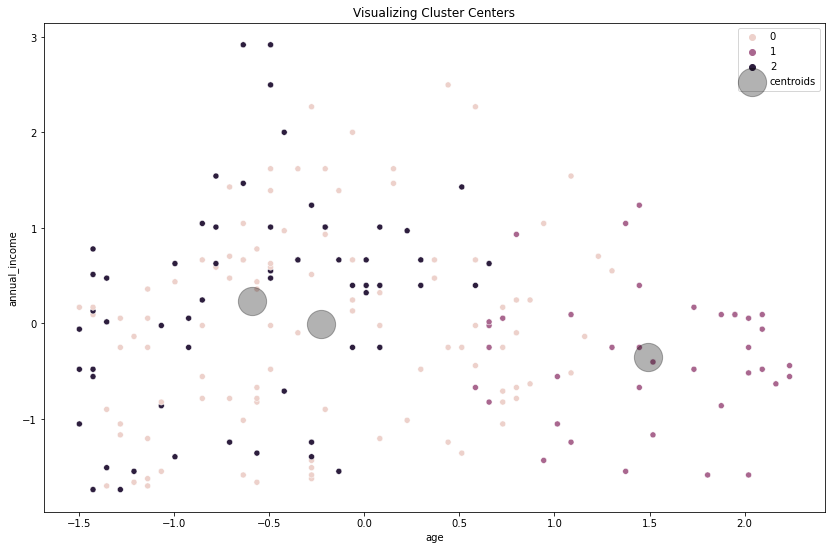

In [32]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'age', y = 'annual_income', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'age', y = 'annual_income', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [39]:
mall['cluster'] = '' + mall.cluster.astype(str)
mall.head()



,is_male,age,annual_income,spending_score,cluster
customer_id,,,,,
1,1,19,15,39,cluster_2
2,1,21,15,81,cluster_2
3,0,20,16,6,cluster_0
4,0,23,16,77,cluster_0
5,0,31,17,40,cluster_0


In [40]:
X_scaled['cluster'] = '' + X_scaled.cluster.astype(str)
X_scaled.head()


,age,annual_income,is_male,cluster
1,-1.424569,-1.738999,1.128152,cluster_2
2,-1.281035,-1.738999,1.128152,cluster_2
3,-1.352802,-1.700830,-0.886405,cluster_0
4,-1.137502,-1.700830,-0.886405,cluster_0
5,-0.563369,-1.662660,-0.886405,cluster_0


<Figure size 1008x648 with 0 Axes>

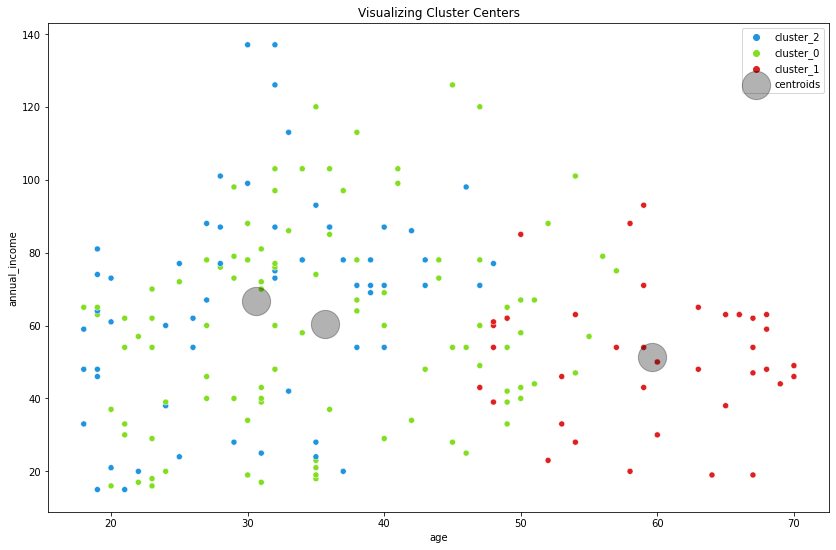

In [35]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'age', y = 'annual_income', data = mall, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'age', y = 'annual_income', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();



In [36]:
# lets look at two clusters (i.e k = 2)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
sns.scatterplot(x='age', y='annual_income', data = X_scaled, hue = 'cluster')

ValueError: could not convert string to float: 'cluster_2'

In [38]:
k = 4

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

ValueError: could not convert string to float: 'cluster_2'

### Takeaway --
The elbow method shows 4 as a good value for k.

In [31]:
#create the model (specify three clusters), fit the model, use the model to predict
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)
kmeans.predict(X_scaled)

array([1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 2, 3, 3, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3,
       3, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3,
       3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0], dtype=int32)

In [32]:
#Add the cluster prediction to the original database

mall['cluster'] = kmeans.predict(X_scaled)
mall.head(2)

ValueError: Length of values (150) does not match length of index (200)

b. Visualize the results of your clustering.

In [1]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
centroids = np.array(mall.groupby('cluster')['age', 'annual_income'].mean())
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]

# cen_x = [i[0] for i in kmeans.cluster_centers_]
# cen_y = [i[1] for i in kmeans.cluster_centers_]
mall['cen_x'] = mall.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
mall['cen_y'] = mall.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
colors = ['#DF2020','#2095DF', '#81DF20' ]
mall['c'] = mall.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

#plot scatter chart for Actual Spending Score and those predicted by K - Means
#specify custom palette for sns scatterplot
colors1 = ['#2095DF','#81DF20' ,'#DF2020']
customPalette = sns.set_palette(sns.color_palette(colors1))

#plot the scatterplots
#Define figure (num of rows, columns and size)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
# plot ax1 
ax1 = plt.subplot(2,1,1) 
sns.scatterplot(data = mall, x = 'age', y = 'is_male', ax = ax1, hue = 'spending_score', palette=customPalette)
plt.title('Actual Spending Score')
#plot ax2
ax2 = plt.subplot(2,1,2) 
ax2.scatter(mall.age, mall.is_male, alpha = 0.6, s=10)
ax2.set(xlabel = 'age', ylabel = 'is_male', title = 'K - Means')
    # plot centroids on  ax2
#ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)
#mall.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
plt.tight_layout()
plt.show()

NameError: name 'np' is not defined

3. How does scaling impact the results of clustering? Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.